- **Purpose:** Go through chapter 8 which fits a GLM model for counts data (Poisson)
- **Date:** August 2, 12025

# 1. Libraries and data

In [1]:
# Load the libraries
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [17]:
# Install AICcmodavg package to calculate the second-order AIC as the sample size is small
install.packages("AICcmodavg")
library(AICcmodavg)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘Rdpack’, ‘reformulas’, ‘TMB’, ‘RcppArmadillo’, ‘RcppEigen’, ‘unmarked’, ‘VGAM’




In [2]:
# Read the data
head(warpbreaks) # R base dataset will be used for this tutorial

,breaks,wool,tension
,<dbl>,<fct>,<fct>
1,26,A,L
2,30,A,L
3,54,A,L
4,25,A,L
5,70,A,L
6,52,A,L


# 2. EDA

In [19]:
# Structure of the dataset
str(warpbreaks)

'data.frame':	54 obs. of  3 variables:
 $ breaks : num  26 30 54 25 70 52 51 26 67 18 ...
 $ wool   : Factor w/ 2 levels "A","B": 1 1 1 1 1 1 1 1 1 1 ...
 $ tension: Factor w/ 3 levels "L","M","H": 1 1 1 1 1 1 1 1 1 2 ...


In [3]:
# Look at the dimension of the dataset
dim(warpbreaks)

[1] 54  3

In [5]:
# Look at the column names
colnames(warpbreaks)

[1] "breaks"  "wool"    "tension"

In [6]:
# Summarize
summary(warpbreaks)

     breaks      wool   tension
 Min.   :10.00   A:27   L:18   
 1st Qu.:18.25   B:27   M:18   
 Median :26.00          H:18   
 Mean   :28.15                 
 3rd Qu.:34.00                 
 Max.   :70.00                 

In [7]:
# Null values
sum(is.na(warpbreaks))

[1] 0

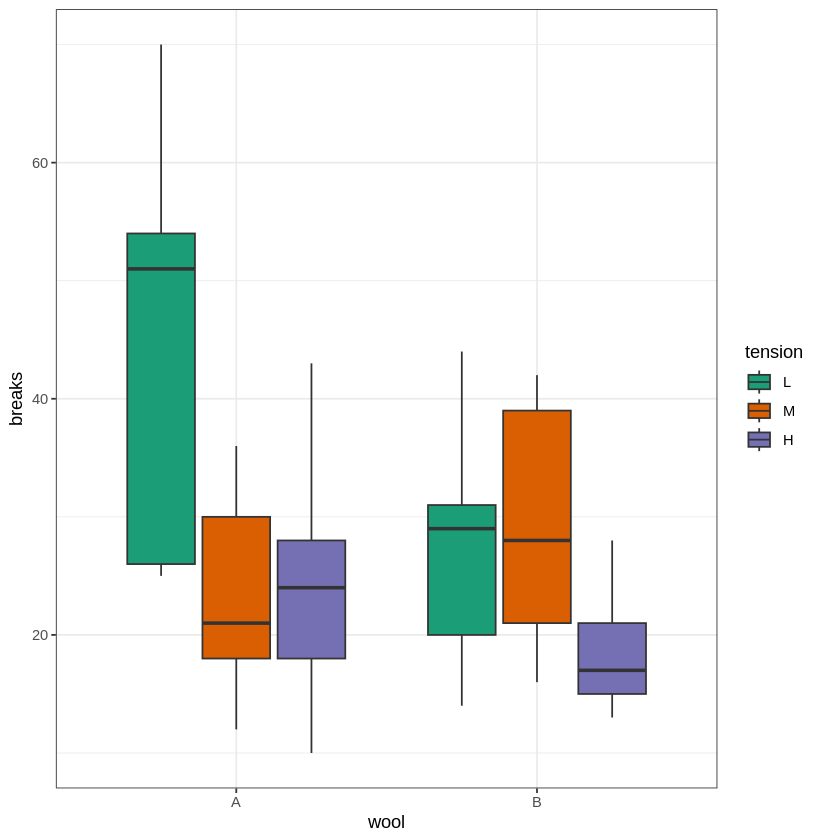

In [9]:
# Visualize breaks per wool and tension types
warpbreaks |>
  ggplot(aes(x = wool, y = breaks, fill = tension)) +
  geom_boxplot() +
  theme_bw() +
  scale_fill_brewer(palette = "Dark2")

# 3. Fit the GLM

In [10]:
# Fit the GLM
glm_full <- glm(
  breaks ~ wool + tension,
  data = warpbreaks,
  family = "poisson"
  )

summary(glm_full)


Call:
glm(formula = breaks ~ wool + tension, family = "poisson", data = warpbreaks)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.69196    0.04541  81.302  < 2e-16 ***
woolB       -0.20599    0.05157  -3.994 6.49e-05 ***
tensionM    -0.32132    0.06027  -5.332 9.73e-08 ***
tensionH    -0.51849    0.06396  -8.107 5.21e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 297.37  on 53  degrees of freedom
Residual deviance: 210.39  on 50  degrees of freedom
AIC: 493.06

Number of Fisher Scoring iterations: 4


In [18]:
# Look at the structure of the model
str(glm_full)

List of 30
 $ coefficients     : Named num [1:4] 3.692 -0.206 -0.321 -0.518
  ..- attr(*, "names")= chr [1:4] "(Intercept)" "woolB" "tensionM" "tensionH"
 $ residuals        : Named num [1:54] -0.352 -0.252 0.346 -0.377 0.745 ...
  ..- attr(*, "names")= chr [1:54] "1" "2" "3" "4" ...
 $ fitted.values    : Named num [1:54] 40.1 40.1 40.1 40.1 40.1 ...
  ..- attr(*, "names")= chr [1:54] "1" "2" "3" "4" ...
 $ effects          : Named num [1:54] -131.23 -3.99 -2.31 -8.11 5.17 ...
  ..- attr(*, "names")= chr [1:54] "(Intercept)" "woolB" "tensionM" "tensionH" ...
 $ R                : num [1:4, 1:4] -39 0 0 0 -17.5 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:4] "(Intercept)" "woolB" "tensionM" "tensionH"
  .. ..$ : chr [1:4] "(Intercept)" "woolB" "tensionM" "tensionH"
 $ rank             : int 4
 $ qr               :List of 5
  ..$ qr   : num [1:54, 1:4] -38.987 0.162 0.162 0.162 0.162 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:54] "1" "2" "3" "4" ...
  ..

In [22]:
# Adjusted AIC
AICc(glm_full)

[1] 493.8723

# 4. Link function and predictions

In [20]:
# Look at the fitted values
glm_full$fitted.values

1        2        3        4        5        6        7        8 
40.12354 40.12354 40.12354 40.12354 40.12354 40.12354 40.12354 40.12354 
       9       10       11       12       13       14       15       16 
40.12354 29.09722 29.09722 29.09722 29.09722 29.09722 29.09722 29.09722 
      17       18       19       20       21       22       23       24 
29.09722 29.09722 23.89035 23.89035 23.89035 23.89035 23.89035 23.89035 
      25       26       27       28       29       30       31       32 
23.89035 23.89035 23.89035 32.65424 32.65424 32.65424 32.65424 32.65424 
      33       34       35       36       37       38       39       40 
32.65424 32.65424 32.65424 32.65424 23.68056 23.68056 23.68056 23.68056 
      41       42       43       44       45       46       47       48 
23.68056 23.68056 23.68056 23.68056 23.68056 19.44298 19.44298 19.44298 
      49       50       51       52       53       54 
19.44298 19.44298 19.44298 19.44298 19.44298 19.44298

In [21]:
# Taking the exponenet
exp(predict(glm_full, newdata = warpbreaks))

1        2        3        4        5        6        7        8 
40.12354 40.12354 40.12354 40.12354 40.12354 40.12354 40.12354 40.12354 
       9       10       11       12       13       14       15       16 
40.12354 29.09722 29.09722 29.09722 29.09722 29.09722 29.09722 29.09722 
      17       18       19       20       21       22       23       24 
29.09722 29.09722 23.89035 23.89035 23.89035 23.89035 23.89035 23.89035 
      25       26       27       28       29       30       31       32 
23.89035 23.89035 23.89035 32.65424 32.65424 32.65424 32.65424 32.65424 
      33       34       35       36       37       38       39       40 
32.65424 32.65424 32.65424 32.65424 23.68056 23.68056 23.68056 23.68056 
      41       42       43       44       45       46       47       48 
23.68056 23.68056 23.68056 23.68056 23.68056 19.44298 19.44298 19.44298 
      49       50       51       52       53       54 
19.44298 19.44298 19.44298 19.44298 19.44298 19.44298

# 5. Contrasts

In [25]:
# Contrast library load
#install.packages("contrast")
library(contrast)
cont <- contrast(
  glm_full,
  list(tension = "M", wool = "A"),
  list(tension = "H", wool = "A"),
  type = "individual"
)

In [26]:
# Print out the results with the matrix used
print(cont, X = TRUE)

glm model parameter contrast

  Contrast       S.E.      Lower     Upper    t df Pr(>|t|)
 0.1971681 0.06833267 0.05991786 0.3344183 2.89 50   0.0058

Contrast coefficients:
 (Intercept) woolB tensionM tensionH
           0     0        1       -1


In [27]:
# Extract the dummy variables dataset
x <- model.matrix(glm_full)
head(x)

,(Intercept),woolB,tensionM,tensionH
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
6,1,0,0,0


In [30]:
# Constants interc, tensM, tensH woolB
coeff <- glm_full$coefficients
v <- c(0, 0, 1, -1) # contrast coefficients
coeff %*% v # contrast (dffference between coefficients)

0.1971681


In [33]:
# Covariance matrix of the coefficients
covmat <- solve(t(x) %*% diag(glm_full$weights) %*% x)
covmat

,(Intercept),woolB,tensionM,tensionH
(Intercept),0.002062131,-1.193312e-03,-1.526712e-03,-1.526712e-03
woolB,-0.001193312,2.659585e-03,-1.400641e-18,-1.892333e-18
tensionM,-0.001526712,-1.010697e-18,3.631967e-03,1.526712e-03
tensionH,-0.001526712,-1.467705e-18,1.526712e-03,4.090810e-03


In [34]:
# t test
dif <- v %*% coeff
se <- sqrt(v %*% covmat %*% v)
tvalue <- dif/se
df <- nrow(x) - ncol(x) # degree of freedom
pt(tvalue, df, lower.tail = FALSE) + pt(-tvalue, df, lower.tail = TRUE)

0.005755553


In [35]:
# Multiple contrasts at once
cont_multi <- contrast(
  glm_full,
  list(tension = c("H", "M"), wool = "A"),
  list(tension = c("M", "L"), wool = "A"),
  type = "individual"
)
print(cont_multi, X=TRUE)

glm model parameter contrast

   Contrast       S.E.      Lower       Upper     t df Pr(>|t|)
 -0.1971681 0.06833267 -0.3344183 -0.05991786 -2.89 50   0.0058
 -0.3213204 0.06026580 -0.4423679 -0.20027301 -5.33 50   0.0000

Contrast coefficients:
 (Intercept) woolB tensionM tensionH
           0     0       -1        1
           0     0        1        0


# 6. Tests

In [37]:
# View the attribute names
str(summary(glm_full))

List of 17
 $ call          : language glm(formula = breaks ~ wool + tension, family = "poisson", data = warpbreaks)
 $ terms         :Classes 'terms', 'formula'  language breaks ~ wool + tension
  .. ..- attr(*, "variables")= language list(breaks, wool, tension)
  .. ..- attr(*, "factors")= int [1:3, 1:2] 0 1 0 0 0 1
  .. .. ..- attr(*, "dimnames")=List of 2
  .. .. .. ..$ : chr [1:3] "breaks" "wool" "tension"
  .. .. .. ..$ : chr [1:2] "wool" "tension"
  .. ..- attr(*, "term.labels")= chr [1:2] "wool" "tension"
  .. ..- attr(*, "order")= int [1:2] 1 1
  .. ..- attr(*, "intercept")= int 1
  .. ..- attr(*, "response")= int 1
  .. ..- attr(*, ".Environment")=<environment: R_GlobalEnv> 
  .. ..- attr(*, "predvars")= language list(breaks, wool, tension)
  .. ..- attr(*, "dataClasses")= Named chr [1:3] "numeric" "factor" "factor"
  .. .. ..- attr(*, "names")= chr [1:3] "breaks" "wool" "tension"
 $ family        :List of 13
  ..$ family    : chr "poisson"
  ..$ link      : chr "log"
  ..$ l

In [38]:
# Extract values and perform chi-square test
d0 <- summary(glm_full)$null.deviance # saturated model - null model
df0 <- summary(glm_full)$df.null # df of null model
d1 <- summary(glm_full)$deviance # saturated model - fitted model
df1 <- summary(glm_full)$df.residual
deltaD <- d0 -d1 # chisq stat of the model (Mfit - Mnull)
dfD <- df0 - df1 # chisq degree of freedom
pchisq(d1, df1, lower.tail = FALSE) # chisq test

[1] 1.44606e-21

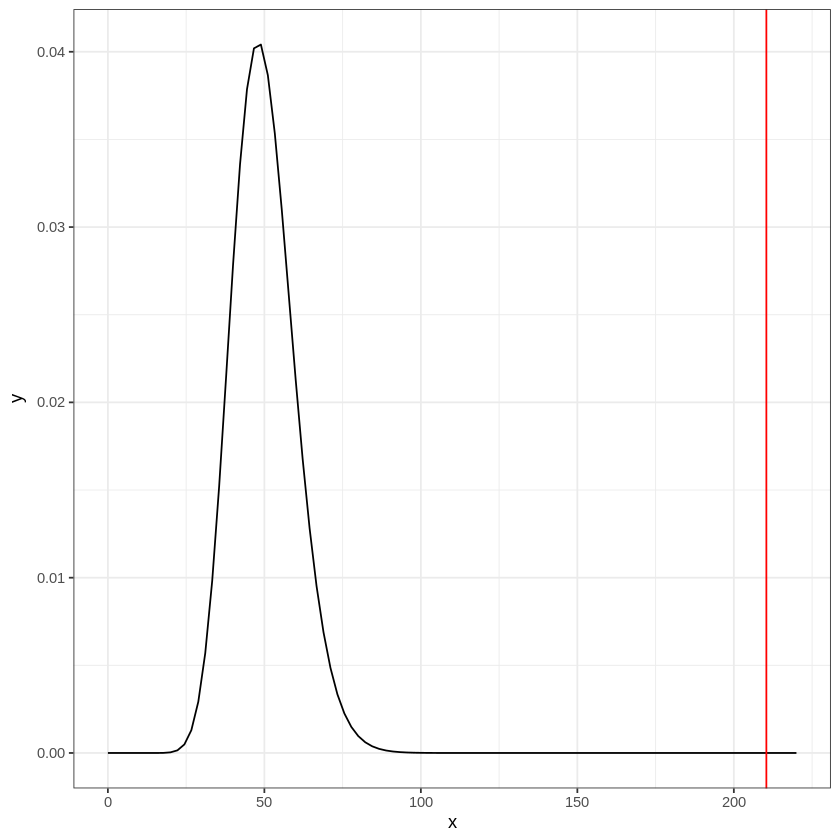

In [42]:
# Graphical presentation of the extremity of the value
tibble(
  x = seq(0, 220, length.out = 100), # based on the value of the deviance
  y = dchisq(x, df1)
) |>
  ggplot() +
  geom_line(aes(x, y)) +
  geom_vline(aes(xintercept = d1), color = "red") +
  theme_bw()

# 7. Influence measures

In [43]:
# Influence measures
infmeas <- influence.measures(glm_full)
str(infmeas)

List of 3
 $ infmat: num [1:54, 1:8] -0.366 -0.255 0.318 -0.395 0.678 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:54] "1" "2" "3" "4" ...
  .. ..$ : chr [1:8] "dfb.1_" "dfb.wolB" "dfb.tnsM" "dfb.tnsH" ...
 $ is.inf: logi [1:54, 1:8] FALSE FALSE FALSE FALSE FALSE FALSE ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:54] "1" "2" "3" "4" ...
  .. ..$ : chr [1:8] "dfb.1_" "dfb.wolB" "dfb.tnsM" "dfb.tnsH" ...
 $ call  : language glm(formula = breaks ~ wool + tension, family = "poisson", data = warpbreaks)
 - attr(*, "class")= chr "infl"


In [44]:
# Influence matrix
infmeasmat <- infmeas$infmat
head(infmeasmat)

,dfb.1_,dfb.wolB,dfb.tnsM,dfb.tnsH,dffit,cov.r,cook.d,hat
1,-0.3663095,0.1866539,0.2043507,0.1925495,-0.3663095,1.0486985,0.12222528,0.08274043
2,-0.2551478,0.1300112,0.1423376,0.1341177,-0.2551478,1.1148176,0.06279697,0.08274043
3,0.3183334,-0.1622075,-0.1775866,-0.1673310,0.3183334,1.0795065,0.11798629,0.08274043
4,-0.3953939,0.2014739,0.2205759,0.2078377,-0.3953939,1.0285388,0.14014604,0.08274043
5,0.6776242,-0.3452850,-0.3780219,-0.3561912,0.6776242,0.7959885,0.54693078,0.08274043
6,0.2735269,-0.1393763,-0.1525907,-0.1437786,0.2735269,1.1052090,0.08642675,0.08274043


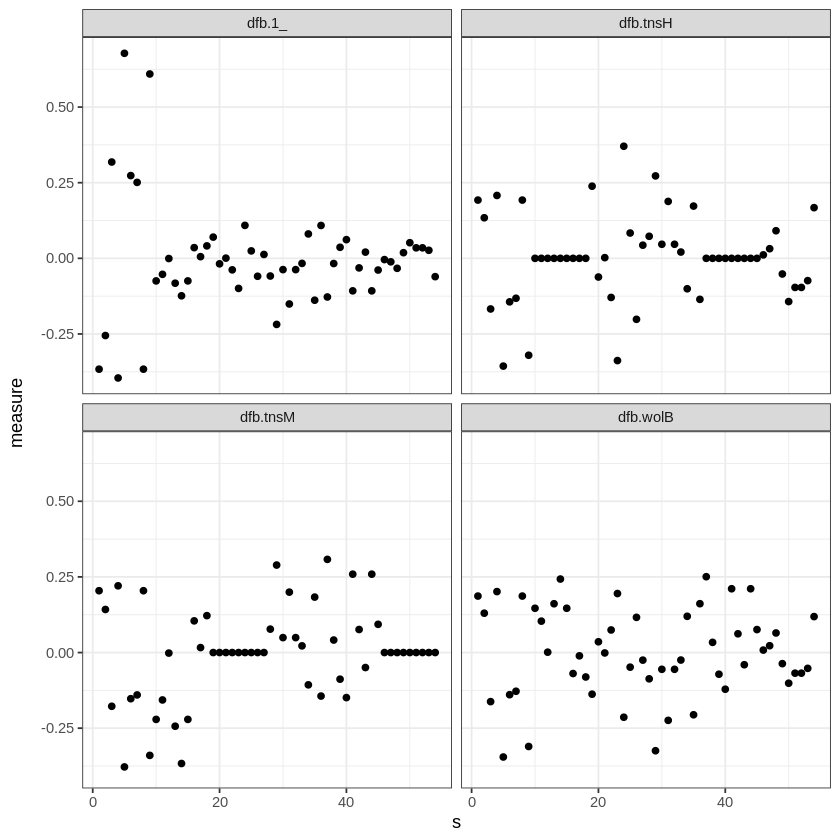

In [46]:
# Plot the influence measure
s <- list(s = 1:nrow(warpbreaks))

bind_cols(infmeasmat, s, warpbreaks) |>
  gather(key = "infl_name", value = "measure", 1:4) |>
  ggplot() +
  geom_point(aes(x = s, y = measure)) +
  facet_wrap(~infl_name) +
  theme_bw()

# 8. Interactions

In [49]:
# Interaction model
glm_int <- glm(breaks ~ tension*wool, data = warpbreaks, family = "poisson")
head(model.matrix(glm_int))

,(Intercept),tensionM,tensionH,woolB,tensionM:woolB,tensionH:woolB
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
5,1,0,0,0,0,0
6,1,0,0,0,0,0


In [50]:
# Summary of the matrix
summary(glm_int)


Call:
glm(formula = breaks ~ tension * wool, family = "poisson", data = warpbreaks)

Coefficients:
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)     3.79674    0.04994  76.030  < 2e-16 ***
tensionM       -0.61868    0.08440  -7.330 2.30e-13 ***
tensionH       -0.59580    0.08378  -7.112 1.15e-12 ***
woolB          -0.45663    0.08019  -5.694 1.24e-08 ***
tensionM:woolB  0.63818    0.12215   5.224 1.75e-07 ***
tensionH:woolB  0.18836    0.12990   1.450    0.147    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 297.37  on 53  degrees of freedom
Residual deviance: 182.31  on 48  degrees of freedom
AIC: 468.97

Number of Fisher Scoring iterations: 4


In [52]:
# Test if this one is a better model - AIC
AIC(glm_full, glm_int)

,df,AIC
,<dbl>,<dbl>
glm_full,4,493.0560
glm_int,6,468.9692


In [56]:
# Test if this one is a better model - AICc
print(paste0("Adjusted/second-order AIC for the interaction model: ", AICc(glm_int)))
print(paste0("Adjusted/second-order AIC for the model without any interaction: ", AICc(glm_full)))

[1] "Adjusted/second-order AIC for the interaction model: 470.756442983904"
[1] "Adjusted/second-order AIC for the model without any interaction: 493.87229294857"


In [57]:
# Chisquare test
anova(glm_full, glm_int, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,50,210.3919,NA,NA,NA
2,48,182.3051,2,28.08676,7.962292e-07


In [58]:
sessionInfo()

R version 4.5.1 (2025-06-13)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 22.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.20.so;  LAPACK version 3.10.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] contrast_0.24.2  AICcmodavg_2.3-4 lubridate_1.9.4  forcats_1.0.0   
 [5] stringr_1.5.1    dplyr_1.1.4      purrr_1.1.0      readr_2.1.5     
 [9] tidyr_1.3.1      tibble_3.3.